In [ ]:
import sys
import sklearn
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR="D:\course\project-1"
CHAPTER_ID="Introduction to Machine Learning"
IMAGE_PATH= os.path.join(PROJECT_ROOT_DIR,"image",CHAPTER_ID)
os.makedirs(IMAGE_PATH,exist_ok=True)
print(PROJECT_ROOT_DIR)
print("The image path is :"+IMAGE_PATH)
def save_fig(fig_id, tight_layout=True, fig_extention="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id+"."+fig_extention)
  print("Saveing figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path,format=fig_extenstion, dpi=resolution)

D:\course\project-1
The image path is :D:\course\project-1/image/Introduction to Machine Learning


##Get the Data

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH= os.path.join("D:\course\project-1\datasets", "housing")
HOUSING_URL=DOWNLOAD_ROOT+"datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path=os.path.join(housing_path,"housing.tgz")
  urllib.request.urlretrieve(housing_url,tgz_path)
  housing_tgz=tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH ):
  csv_path=os.path.join(housing_path,"housing.csv")
  return pd.read_csv(csv_path)

In [ ]:
housing= load_housing_data()
housing.head(n=10) #DataFrame.head is used to get the first n rows, default n=5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


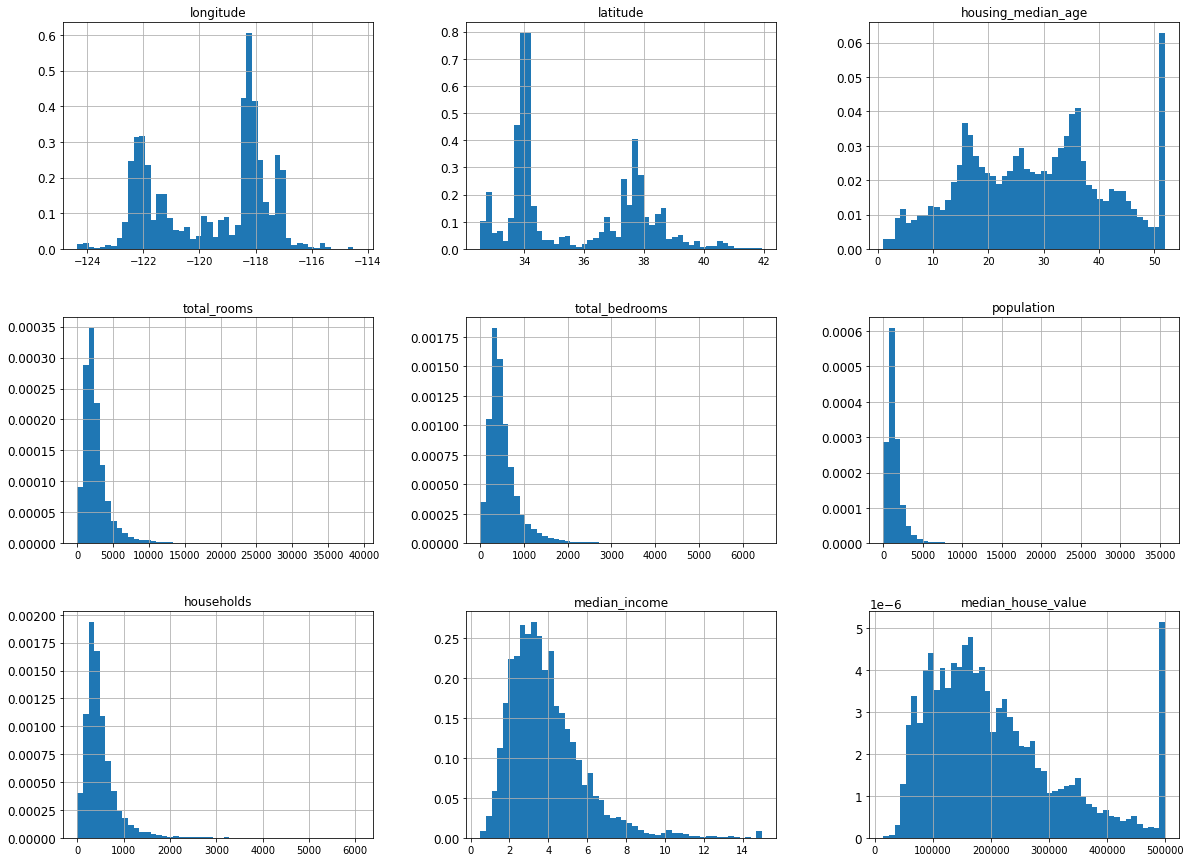

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15),density=True)
#save_fig("attribute_histogram_plots")
plt.show()

##Draw a normal distribution for the histogram

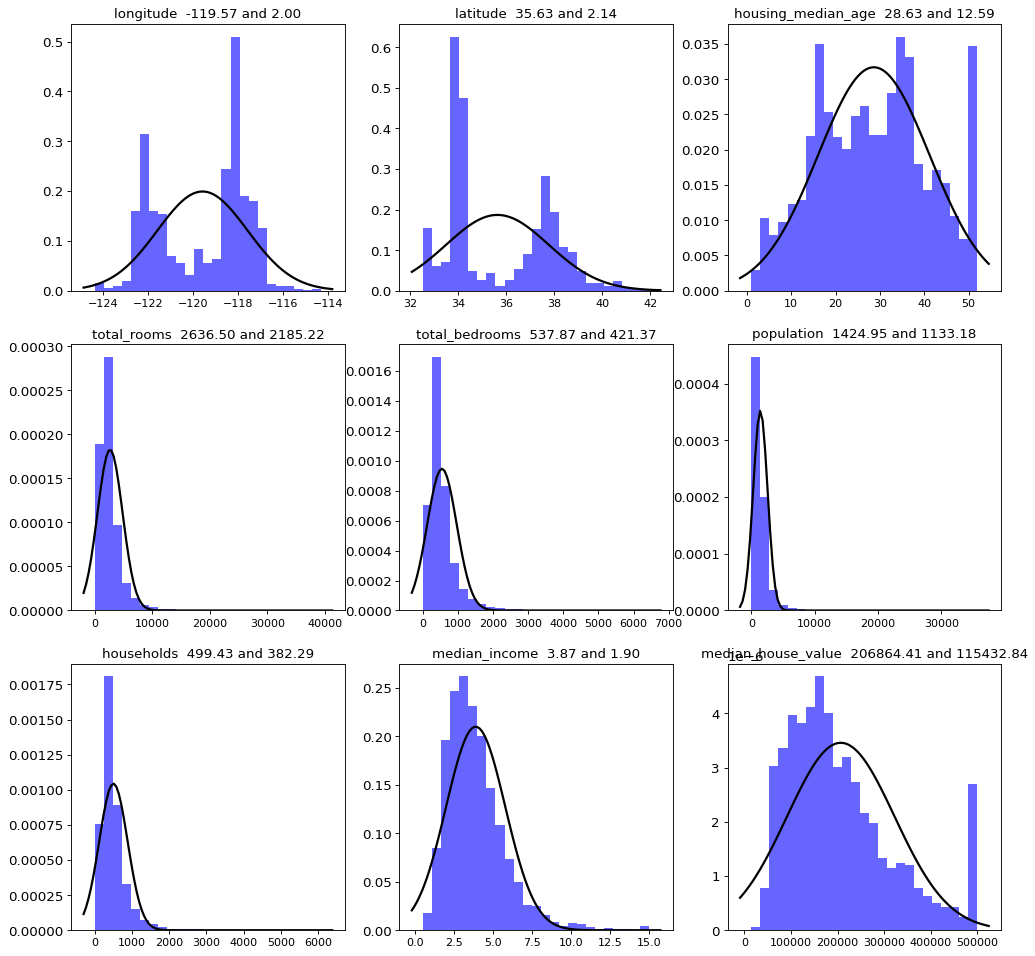

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15), dpi=80)
housing1=housing.dropna()

for col in range(0, 9):
  # Generate some data for this 
  # demonstration.
  data = housing1[housing1.columns[col]]
  
  # Fit a normal distribution to
  # the data:
  # mean and standard deviation
  mu, std = norm.fit(data) 
  
  # Plot the histogram.
  plt.subplot(3, 3, col+1)
  plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
  # Plot the PDF.
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)
  
  plt.plot(x, p, 'k', linewidth=2)
  title = housing1.columns[col]+"  {:.2f} and {:.2f}".format(mu, std)
  plt.title(title)  
plt.show()

##Create a Test Set

In [ ]:
import numpy as np
np.random.seed(42)
#housing=housing.dropna()

housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

#Data normalization
mu = np.mean(housing,axis=0)
sigma = np.std(housing,axis=0)
housing = (housing - mu)/sigma


#for illustration only. sklearn has train_test_split()
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size=int(len(data)*test_ratio)
  test_indices= shuffled_indices[:test_set_size]
  train_indices= shuffled_indices[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]


In [ ]:
train_set, test_set = split_train_test(housing,0.2)

In [ ]:
print(len(train_set))
print(len(test_set))

16512
4128


In [ ]:
train_set.head()

,households,housing_median_age,latitude,longitude,median_house_value,median_income,ocean_proximity,population,total_bedrooms,total_rooms
14196,0.322924,0.346478,-1.367976,1.267645,-0.900020,-0.321654,NaN,0.772251,0.214986,0.224718
8267,0.670799,1.617807,-0.871699,0.703627,1.518675,-0.030620,NaN,-0.098440,0.596500,0.342065
17445,-0.427755,-1.957806,-0.455012,-0.454356,-0.296863,0.150349,NaN,-0.450778,-0.490815,-0.338639
14265,-0.378059,0.584852,-1.377340,1.227714,-0.983214,-1.014947,NaN,-0.006602,-0.404974,-0.556832
2271,-0.312669,1.141059,0.537543,-0.114948,-0.956349,-0.166583,NaN,-0.486983,-0.252369,-0.116322


##Create a Test Set with **sklearn**

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

train_set.head()

,households,housing_median_age,latitude,longitude,median_house_value,median_income,ocean_proximity,population,total_bedrooms,total_rooms
14196,0.322924,0.346478,-1.367976,1.267645,-0.900020,-0.321654,NaN,0.772251,0.214986,0.224718
8267,0.670799,1.617807,-0.871699,0.703627,1.518675,-0.030620,NaN,-0.098440,0.596500,0.342065
17445,-0.427755,-1.957806,-0.455012,-0.454356,-0.296863,0.150349,NaN,-0.450778,-0.490815,-0.338639
14265,-0.378059,0.584852,-1.377340,1.227714,-0.983214,-1.014947,NaN,-0.006602,-0.404974,-0.556832
2271,-0.312669,1.141059,0.537543,-0.114948,-0.956349,-0.166583,NaN,-0.486983,-0.252369,-0.116322


In [ ]:
X=pd.DataFrame(train_set,columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income'])
X=X.to_numpy()
X

array([[ 1.26764451, -1.36797628,  0.34647803, ...,  0.7722505 ,
         0.32292363, -0.32165429],
       [ 0.7036268 , -0.87169852,  1.61780729, ..., -0.09843989,
         0.67079931, -0.03061993],
       [-0.45435647, -0.45501247, -1.95780625, ..., -0.45077809,
        -0.42775547,  0.1503488 ],
       ...,
       [ 0.59381804, -0.74997001,  0.58485227, ...,  0.2918696 ,
         0.07182539, -0.49283239],
       [-1.19306993,  0.91209231, -1.08376738, ...,  0.31041371,
         0.1555248 ,  0.97302487],
       [-1.42267006,  1.00104776,  1.85618152, ...,  1.05394445,
         1.94198411, -0.68174943]])

In [ ]:
X_test=pd.DataFrame(test_set,columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income'])
X_test=X_test.to_numpy()
X_test

array([[ 0.27936569,  0.20044873, -0.2891866 , ..., -0.02956174,
        -0.36759652, -1.15248922],
       [ 0.05475686, -0.23028292,  0.10810379, ...,  0.12320645,
         0.22091497, -0.70501534],
       [-1.43265267,  1.01509336,  1.85618152, ..., -0.1019721 ,
         1.21222987, -0.20558796],
       ...,
       [-1.23799169,  0.78568194, -0.2891866 , ...,  0.14086751,
         0.17906526,  2.82092723],
       [-0.09498235,  0.53286119,  0.58485227, ..., -0.17526551,
        -0.06680176, -0.57147326],
       [ 0.59880935, -0.66101456, -0.92485123, ...,  0.21681008,
        -0.13480753, -0.16768875]])

In [ ]:
y=pd.DataFrame(train_set,columns=['median_house_value'])
y=y.to_numpy()
y

array([[-0.90001975],
       [ 1.51867493],
       [-0.29686264],
       ...,
       [ 0.13210686],
       [ 0.66420236],
       [ 1.02384345]])

In [ ]:
y_test=pd.DataFrame(test_set,columns=['median_house_value'])
y_test=y_test.to_numpy()
y

array([[-0.90001975],
       [ 1.51867493],
       [-0.29686264],
       ...,
       [ 0.13210686],
       [ 0.66420236],
       [ 1.02384345]])

**Goal.** Given $X$ and $y$, our goal is to find $\omega$ such that: 

---



$$X \omega = y$$

1. To solve the above equation for $\theta$, first we multiply both sides by $X^T$

2. Now, we can compute the **inverse** matrix of $X^T X$ and multiply it on both sides of the above equation.

$$(X^T X)^{-1} (X^T X) \omega = (X^T X)^{-1} X^T y$$ 

Hence, we obtatin

$$\omega = (X^T X)^{-1} X^T y = X^{+} y$$ 

<div class="alert alert-info">
    <strong>Pseudo-inverse:</strong> In the above equation, $X^+$ is called pseudo-inverse.
</div>


## Implement a gradient in Python




In [ ]:
import numpy as np
from numpy.linalg import pinv  # pseudo-inverse

In [ ]:
print(X.shape)

(16512, 8)


In [ ]:
mu = np.mean(X, axis = 0)  
sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
X_norm = (X - mu)/sigma
print(X_norm)

[[ 1.27254803 -1.37276963  0.34847969 ...  0.76825302  0.32289613
  -0.32618613]
 [ 0.70914065 -0.87666947  1.61806913 ... -0.09889835  0.67200685
  -0.03584229]
 [-0.44758954 -0.46013254 -1.95265115 ... -0.44980444 -0.43044805
   0.14469707]
 ...
 [ 0.59945072 -0.75498452  0.58652771 ...  0.28982468  0.07090644
  -0.49695808]
 [-1.18550363  0.906483   -1.07980842 ...  0.30829342  0.154903
   0.96542121]
 [-1.4148553   0.99540662  1.85611714 ...  1.04880199  1.94770467
  -0.68542689]]


In [ ]:
X = np.concatenate((np.vstack(np.ones_like(X[:,0])), X), axis=1) 
X_test=np.concatenate((np.vstack(np.ones_like(X_test[:,0])), X_test), axis=1) 

In [ ]:
print(X)

[[ 1.          1.26764451 -1.36797628 ...  0.7722505   0.32292363
  -0.32165429]
 [ 1.          0.7036268  -0.87169852 ... -0.09843989  0.67079931
  -0.03061993]
 [ 1.         -0.45435647 -0.45501247 ... -0.45077809 -0.42775547
   0.1503488 ]
 ...
 [ 1.          0.59381804 -0.74997001 ...  0.2918696   0.07182539
  -0.49283239]
 [ 1.         -1.19306993  0.91209231 ...  0.31041371  0.1555248
   0.97302487]
 [ 1.         -1.42267006  1.00104776 ...  1.05394445  1.94198411
  -0.68174943]]


In [ ]:
%%time
omega = pinv(X) @ y

CPU times: user 6.84 ms, sys: 6.17 ms, total: 13 ms
Wall time: 9.13 ms


Wall time: 520 ms

In [ ]:
omega

array([[-0.00186476],
       [-0.74019579],
       [-0.78574331],
       [ 0.12900247],
       [-0.15479804],
       [ 0.42253385],
       [-0.37775242],
       [ 0.15354261],
       [ 0.66740613]])

In [ ]:
print(omega.shape)

(9, 1)


## Prediction

In [ ]:
def mse(y_pred, y_true):
    return 0.5 * ((y_pred - y_true) ** 2).mean()

In [ ]:
y_pred = X @ omega
print(y_pred.shape)
print(y.shape)

(16512, 1)
(16512, 1)


In [ ]:
error = mse(y_pred,y)
error

0.18065913084878082

In [ ]:
y_pred= X_test @ omega

In [ ]:
error =mse(y_pred,y_test)
print(error)

0.1900013980265915


In [ ]:
np.concatenate((y_pred,y_test),axis=1)

array([[-1.24027843, -1.37925233],
       [-0.4550649 , -1.39571783],
       [ 0.40052212,  2.54041094],
       ...,
       [ 2.01331746,  2.54041094],
       [-0.66249324, -1.16606749],
       [-0.27370477, -0.4797163 ]])

## Implement a gradient + l2-norm regularization  in Python

In [ ]:
X.shape

(16512, 9)

In [ ]:
lamda=10
m,n = X.shape
I = np.eye((n))
omega_l=(np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y)

In [ ]:
omega_l

array([[-0.00183429],
       [-0.73327692],
       [-0.77888918],
       [ 0.12961755],
       [-0.15256419],
       [ 0.41427024],
       [-0.37692321],
       [ 0.15904108],
       [ 0.66713128]])

In [ ]:
y_pred_l= X_test @ omega_l

In [ ]:
error = y_pred_l - y_test
print(error)

[[ 0.14125311]
 [ 0.94338224]
 [-2.13180453]
 ...
 [-0.52860743]
 [ 0.50786798]
 [ 0.20515602]]


In [ ]:
np.concatenate((y_pred_l,y_test),axis=1)

array([[-1.23799922, -1.37925233],
       [-0.45233559, -1.39571783],
       [ 0.40860641,  2.54041094],
       ...,
       [ 2.01180351,  2.54041094],
       [-0.65819952, -1.16606749],
       [-0.27456028, -0.4797163 ]])

## Implement a gradient Descent

In [ ]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    cost_history =[]
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        cost_history.append(cost)
        print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta,cost_history

In [ ]:
theta = np.zeros(X.shape[1]).reshape(X.shape[1],1)
iterations = 5000;
alpha = 0.005;
m, n = np.shape(X)

In [ ]:
theta,cost_history = gradientDescent(X, y, theta, alpha, m, iterations)

Iteration 0 | Cost: 0.501967
Iteration 1 | Cost: 0.499276
Iteration 2 | Cost: 0.496614
Iteration 3 | Cost: 0.493980
Iteration 4 | Cost: 0.491373
Iteration 5 | Cost: 0.488794
Iteration 6 | Cost: 0.486242
Iteration 7 | Cost: 0.483717
Iteration 8 | Cost: 0.481218
Iteration 9 | Cost: 0.478746
Iteration 10 | Cost: 0.476299
Iteration 11 | Cost: 0.473877
Iteration 12 | Cost: 0.471481
Iteration 13 | Cost: 0.469109
Iteration 14 | Cost: 0.466762
Iteration 15 | Cost: 0.464439
Iteration 16 | Cost: 0.462139
Iteration 17 | Cost: 0.459864
Iteration 18 | Cost: 0.457612
Iteration 19 | Cost: 0.455383
Iteration 20 | Cost: 0.453176
Iteration 21 | Cost: 0.450992
Iteration 22 | Cost: 0.448831
Iteration 23 | Cost: 0.446691
Iteration 24 | Cost: 0.444573
Iteration 25 | Cost: 0.442476
Iteration 26 | Cost: 0.440401
Iteration 27 | Cost: 0.438347
Iteration 28 | Cost: 0.436313
Iteration 29 | Cost: 0.434300
Iteration 30 | Cost: 0.432307
Iteration 31 | Cost: 0.430334
Iteration 32 | Cost: 0.428381
Iteration 33 | Cost:

In [ ]:
theta

array([[-0.00138706],
       [-0.59955807],
       [-0.64646486],
       [ 0.14558252],
       [-0.1292437 ],
       [ 0.291559  ],
       [-0.37452454],
       [ 0.26181205],
       [ 0.67522038]])

In [ ]:
omega

array([[-0.00186476],
       [-0.74019579],
       [-0.78574331],
       [ 0.12900247],
       [-0.15479804],
       [ 0.42253385],
       [-0.37775242],
       [ 0.15354261],
       [ 0.66740613]])

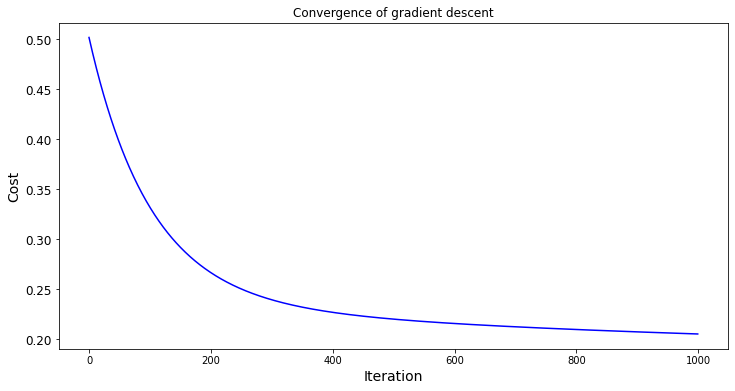

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(cost_history[0:1000],color='blue')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title("Convergence of gradient descent")
plt.show()